In [46]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
import pandas as pd

plt.rcParams["font.sans-serif"] = ["Simhei"]
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df_pb = pd.read_excel('1.2铅钡.xlsx')
df_cor1 = df_pb.iloc[:, 4:-1]

In [10]:
df_k = pd.read_excel('1.2高钾.xlsx')
df_cor2 = df_k.iloc[:, 4:-1]
df_cor2.shape

(18, 14)

In [4]:
df_cor1.shape

(49, 14)

## 检验正态分布

In [5]:
def JB(X):
    result = stats.jarque_bera(X)
    return pd.Series(result, index=['JB', 'pvalue']).round(4)
JB_test = df_cor1.apply(JB)
JB_test

二氧化硅(SiO2)  氧化钠(Na2O)  氧化钾(K2O)  氧化钙(CaO)  氧化镁(MgO)  氧化铝(Al2O3)  \
JB          2.3647    80.9107  196.3861    4.5514    4.9970     85.7798   
pvalue      0.3066     0.0000    0.0000    0.1027    0.0822      0.0000   

        氧化铁(Fe2O3)  氧化铜(CuO)  氧化铅(PbO)  氧化钡(BaO)  五氧化二磷(P2O5)  氧化锶(SrO)  \
JB         77.2935   83.5613    2.1133   27.3796       9.2358    4.9018   
pvalue      0.0000    0.0000    0.3476    0.0000       0.0099    0.0862   

        氧化锡(SnO2)  二氧化硫(SO2)  
JB      1259.0507   782.4973  
pvalue     0.0000     0.0000

In [6]:
JB_test.iloc[1,:] > 0.05

二氧化硅(SiO2)      True
氧化钠(Na2O)      False
氧化钾(K2O)       False
氧化钙(CaO)        True
氧化镁(MgO)        True
氧化铝(Al2O3)     False
氧化铁(Fe2O3)     False
氧化铜(CuO)       False
氧化铅(PbO)        True
氧化钡(BaO)       False
五氧化二磷(P2O5)    False
氧化锶(SrO)        True
氧化锡(SnO2)      False
二氧化硫(SO2)      False
Name: pvalue, dtype: bool

In [8]:
def SW(X):
    result = stats.shapiro(X)
    return pd.Series(result, index=['SW', 'pvalue']).round(4)
SW_test = df_cor2.apply(SW)
SW_test

二氧化硅(SiO2)  氧化钠(Na2O)  氧化钾(K2O)  氧化钙(CaO)  氧化镁(MgO)  氧化铝(Al2O3)  \
SW          0.8520     0.4823    0.8641    0.8593    0.8817      0.9480   
pvalue      0.0091     0.0000    0.0142    0.0119    0.0279      0.3949   

        氧化铁(Fe2O3)  氧化铜(CuO)  氧化铅(PbO)  氧化钡(BaO)  五氧化二磷(P2O5)  氧化锶(SrO)  \
SW           0.788    0.9489    0.6052    0.5557       0.6925    0.6734   
pvalue       0.001    0.4085    0.0000    0.0000       0.0001    0.0000   

        氧化锡(SnO2)  二氧化硫(SO2)  
SW         0.2527     0.4786  
pvalue     0.0000     0.0000

In [9]:
SW_test.iloc[1,:] > 0.05

二氧化硅(SiO2)     False
氧化钠(Na2O)      False
氧化钾(K2O)       False
氧化钙(CaO)       False
氧化镁(MgO)       False
氧化铝(Al2O3)      True
氧化铁(Fe2O3)     False
氧化铜(CuO)        True
氧化铅(PbO)       False
氧化钡(BaO)       False
五氧化二磷(P2O5)    False
氧化锶(SrO)       False
氧化锡(SnO2)      False
二氧化硫(SO2)      False
Name: pvalue, dtype: bool

## 矩阵散点图

In [17]:
# 不满足正态分布，使用斯皮尔曼相关系数
# 绘制发散调色板用作cmap
# cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
cmap = sns.color_palette('vlag', as_cmap=True)
# cmap = sns.color_palette('coolwarm', as_cmap=True)

In [18]:
correlations1 = df_cor1.corr('spearman')
correlations1.fillna(0,inplace=True)
#correlations

In [19]:
def PvalueGetSpearman(X, Y):
    return stats.spearmanr(X, Y)[1]#.round(4)
df_cor1.corr(method=PvalueGetSpearman).fillna(0,inplace=True)

In [20]:
Cor_p = df_cor1.corr(method=PvalueGetSpearman)
COR_p=correlations1[Cor_p>0.05]
cor_p = correlations1[Cor_p>0.01]

## 铅钡

### 未剔除的热力图

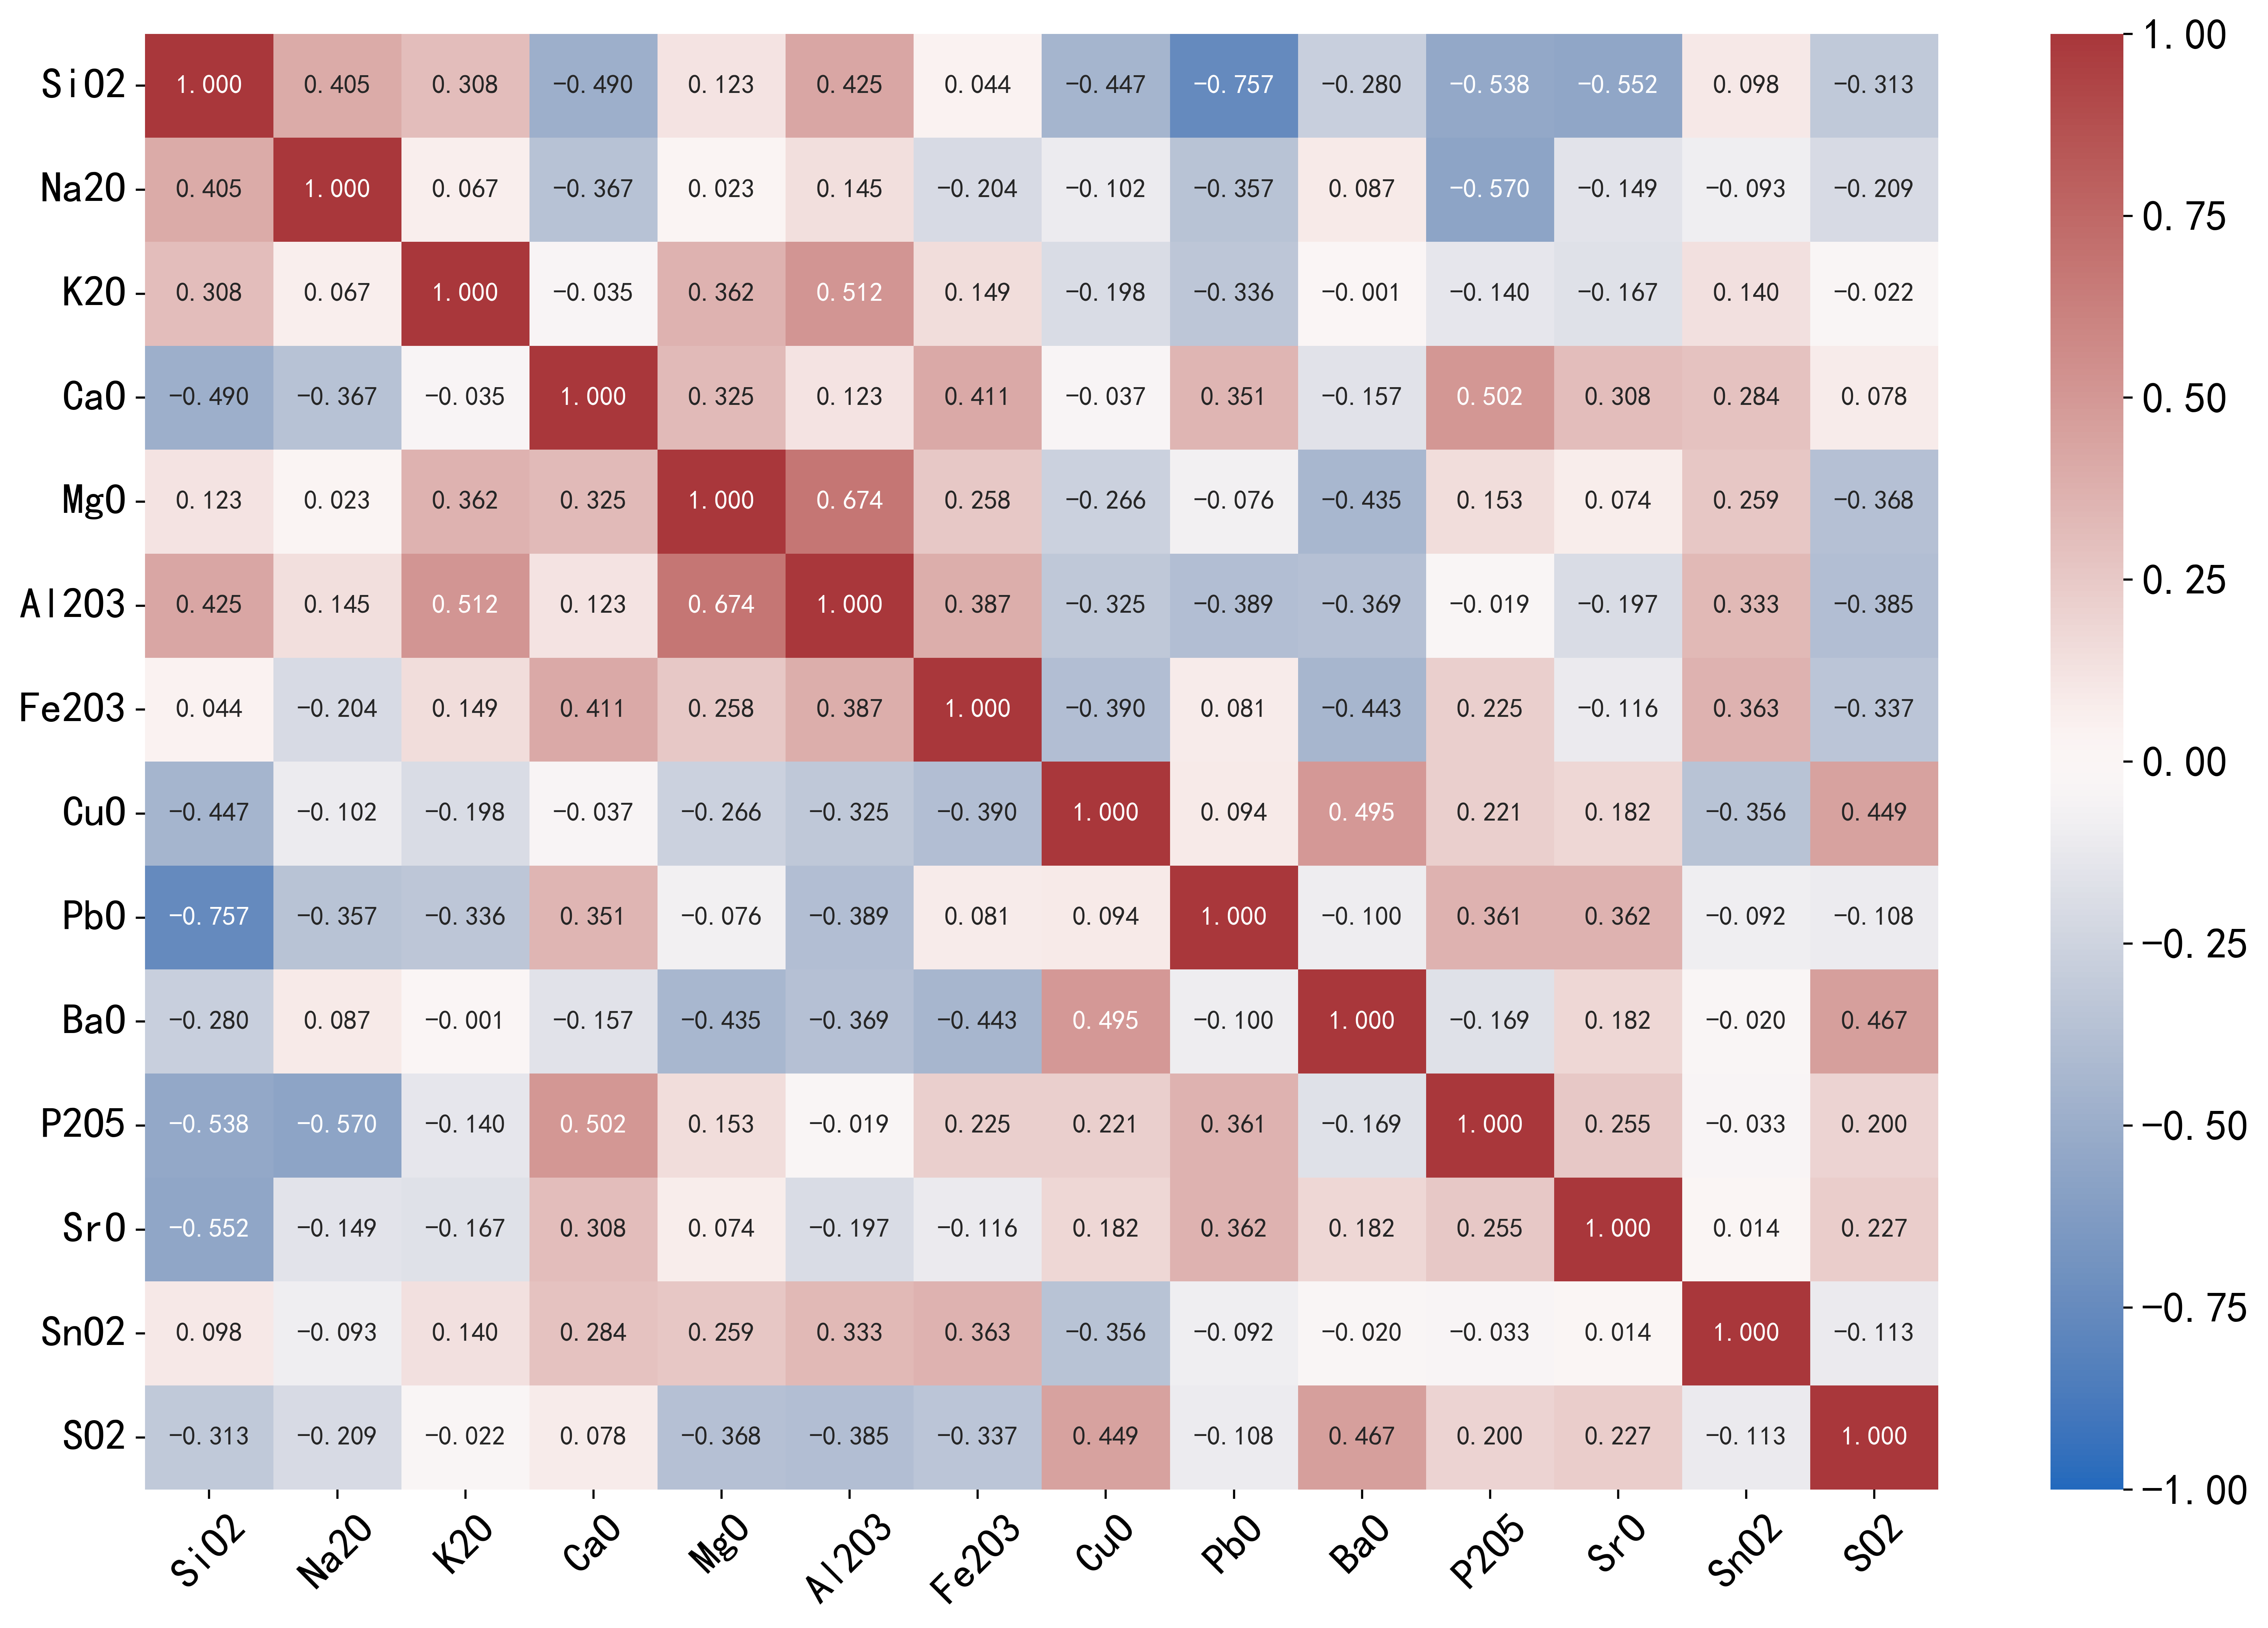

In [67]:
col = ['SiO2','Na2O','K2O','CaO','MgO','Al2O3','Fe2O3','CuO','PbO','BaO','P2O5','SrO','SnO2','SO2']
# 在heatmap(square=False)时可以调整图片大小，x、y轴标签的方向
plt.figure(figsize=(15,10))
ax = sns.heatmap(correlations1, vmin=-1, vmax=1, cmap=cmap, annot=True, fmt='.3f')
ax.set_xticklabels(col, rotation=45)
ax.set_yticklabels(col, rotation='horizontal')
plt.savefig('C:/Users/86180/Desktop/C题/image/cor_p.svg')
plt.show()

In [22]:
print('铅钡玻璃化学成分相互关系平均值分析：\n')
COR_p_3=abs(correlations1[abs(correlations1)>0]).mean()
COR_p_3.sort_values(ascending=False)

铅钡玻璃化学成分相互关系平均值分析：



二氧化硅(SiO2)     0.412853
氧化铝(Al2O3)     0.377278
氧化铜(CuO)       0.325702
氧化钙(CaO)       0.319127
氧化铅(PbO)       0.318803
氧化铁(Fe2O3)     0.314845
氧化镁(MgO)       0.313937
五氧化二磷(P2O5)    0.313168
二氧化硫(SO2)      0.305379
氧化钡(BaO)       0.300133
氧化锶(SrO)       0.270366
氧化钠(Na2O)      0.269813
氧化钾(K2O)       0.245485
氧化锡(SnO2)      0.228493
dtype: float64

### 以0.01为阈值的热力图

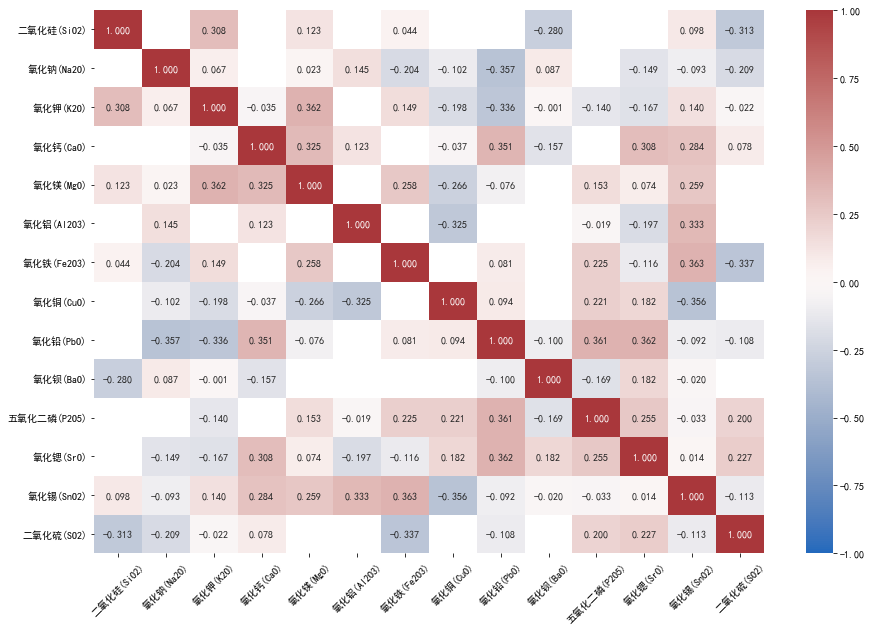

In [23]:
# 在heatmap(square=False)时可以调整图片大小，x、y轴标签的方向
plt.figure(figsize=(15,10))
ax = sns.heatmap(cor_p, vmin=-1, vmax=1, cmap=cmap, annot=True, fmt='.3f')
ax.set_xticklabels(df_cor1.columns, rotation=45)
ax.set_yticklabels(df_cor1.columns, rotation='horizontal')
plt.savefig('C:/Users/86180/Desktop/C题/image/cor_p_0.01.png')
plt.show()

### 以0.05为阈值的热力图

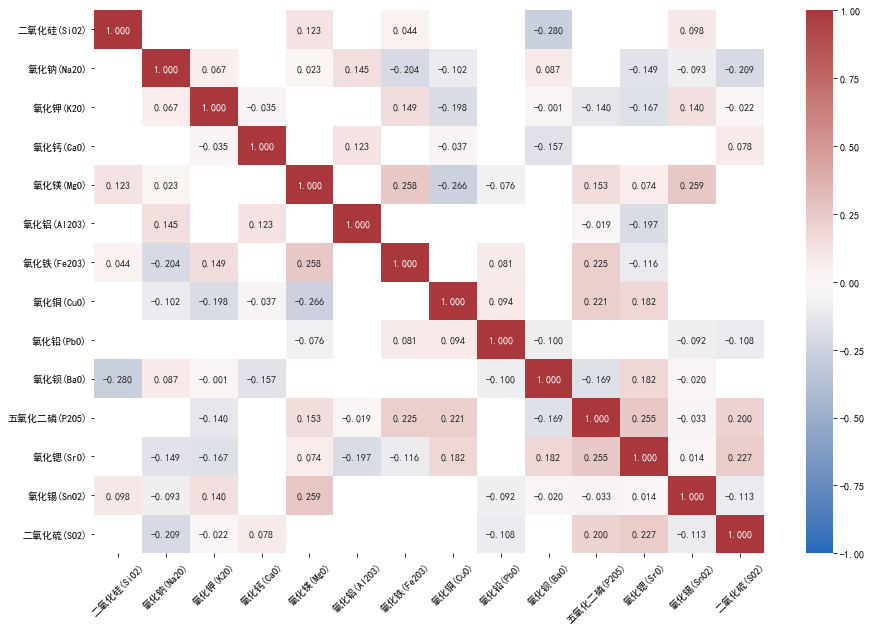

In [24]:
# 在heatmap(square=False)时可以调整图片大小，x、y轴标签的方向
plt.figure(figsize=(15,10))
ax = sns.heatmap(COR_p, vmin=-1, vmax=1, cmap=cmap, annot=True, fmt='.3f')
ax.set_xticklabels(df_cor1.columns, rotation=45)
ax.set_yticklabels(df_cor1.columns, rotation='horizontal')
plt.savefig('C:/Users/86180/Desktop/C题/image/cor_p_0.05.png')
plt.show()

## 高钾

In [25]:
correlations2 = df_cor2.corr('spearman')
correlations2.fillna(0,inplace=True)
#correlations

In [26]:
def PvalueGetSpearman(X, Y):
    return stats.spearmanr(X, Y)[1]#.round(4)
df_cor2.corr(method=PvalueGetSpearman).fillna(0,inplace=True)

In [27]:
Cor_k = df_cor2.corr(method=PvalueGetSpearman)
COR_k=correlations2[Cor_k>0.05]
cor_k = correlations2[Cor_k>0.01]

### 全部数据热力图

In [60]:
params = {
    "font.sans-serif":"Simhei",
    "axes.titlesize": 22,
    "legend.fontsize": 16,
    "figure.figsize": (10, 8),
    "figure.dpi":500,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.titlesize": 22,
    "axes.unicode_minus": False
}
plt.rcParams.update(params)

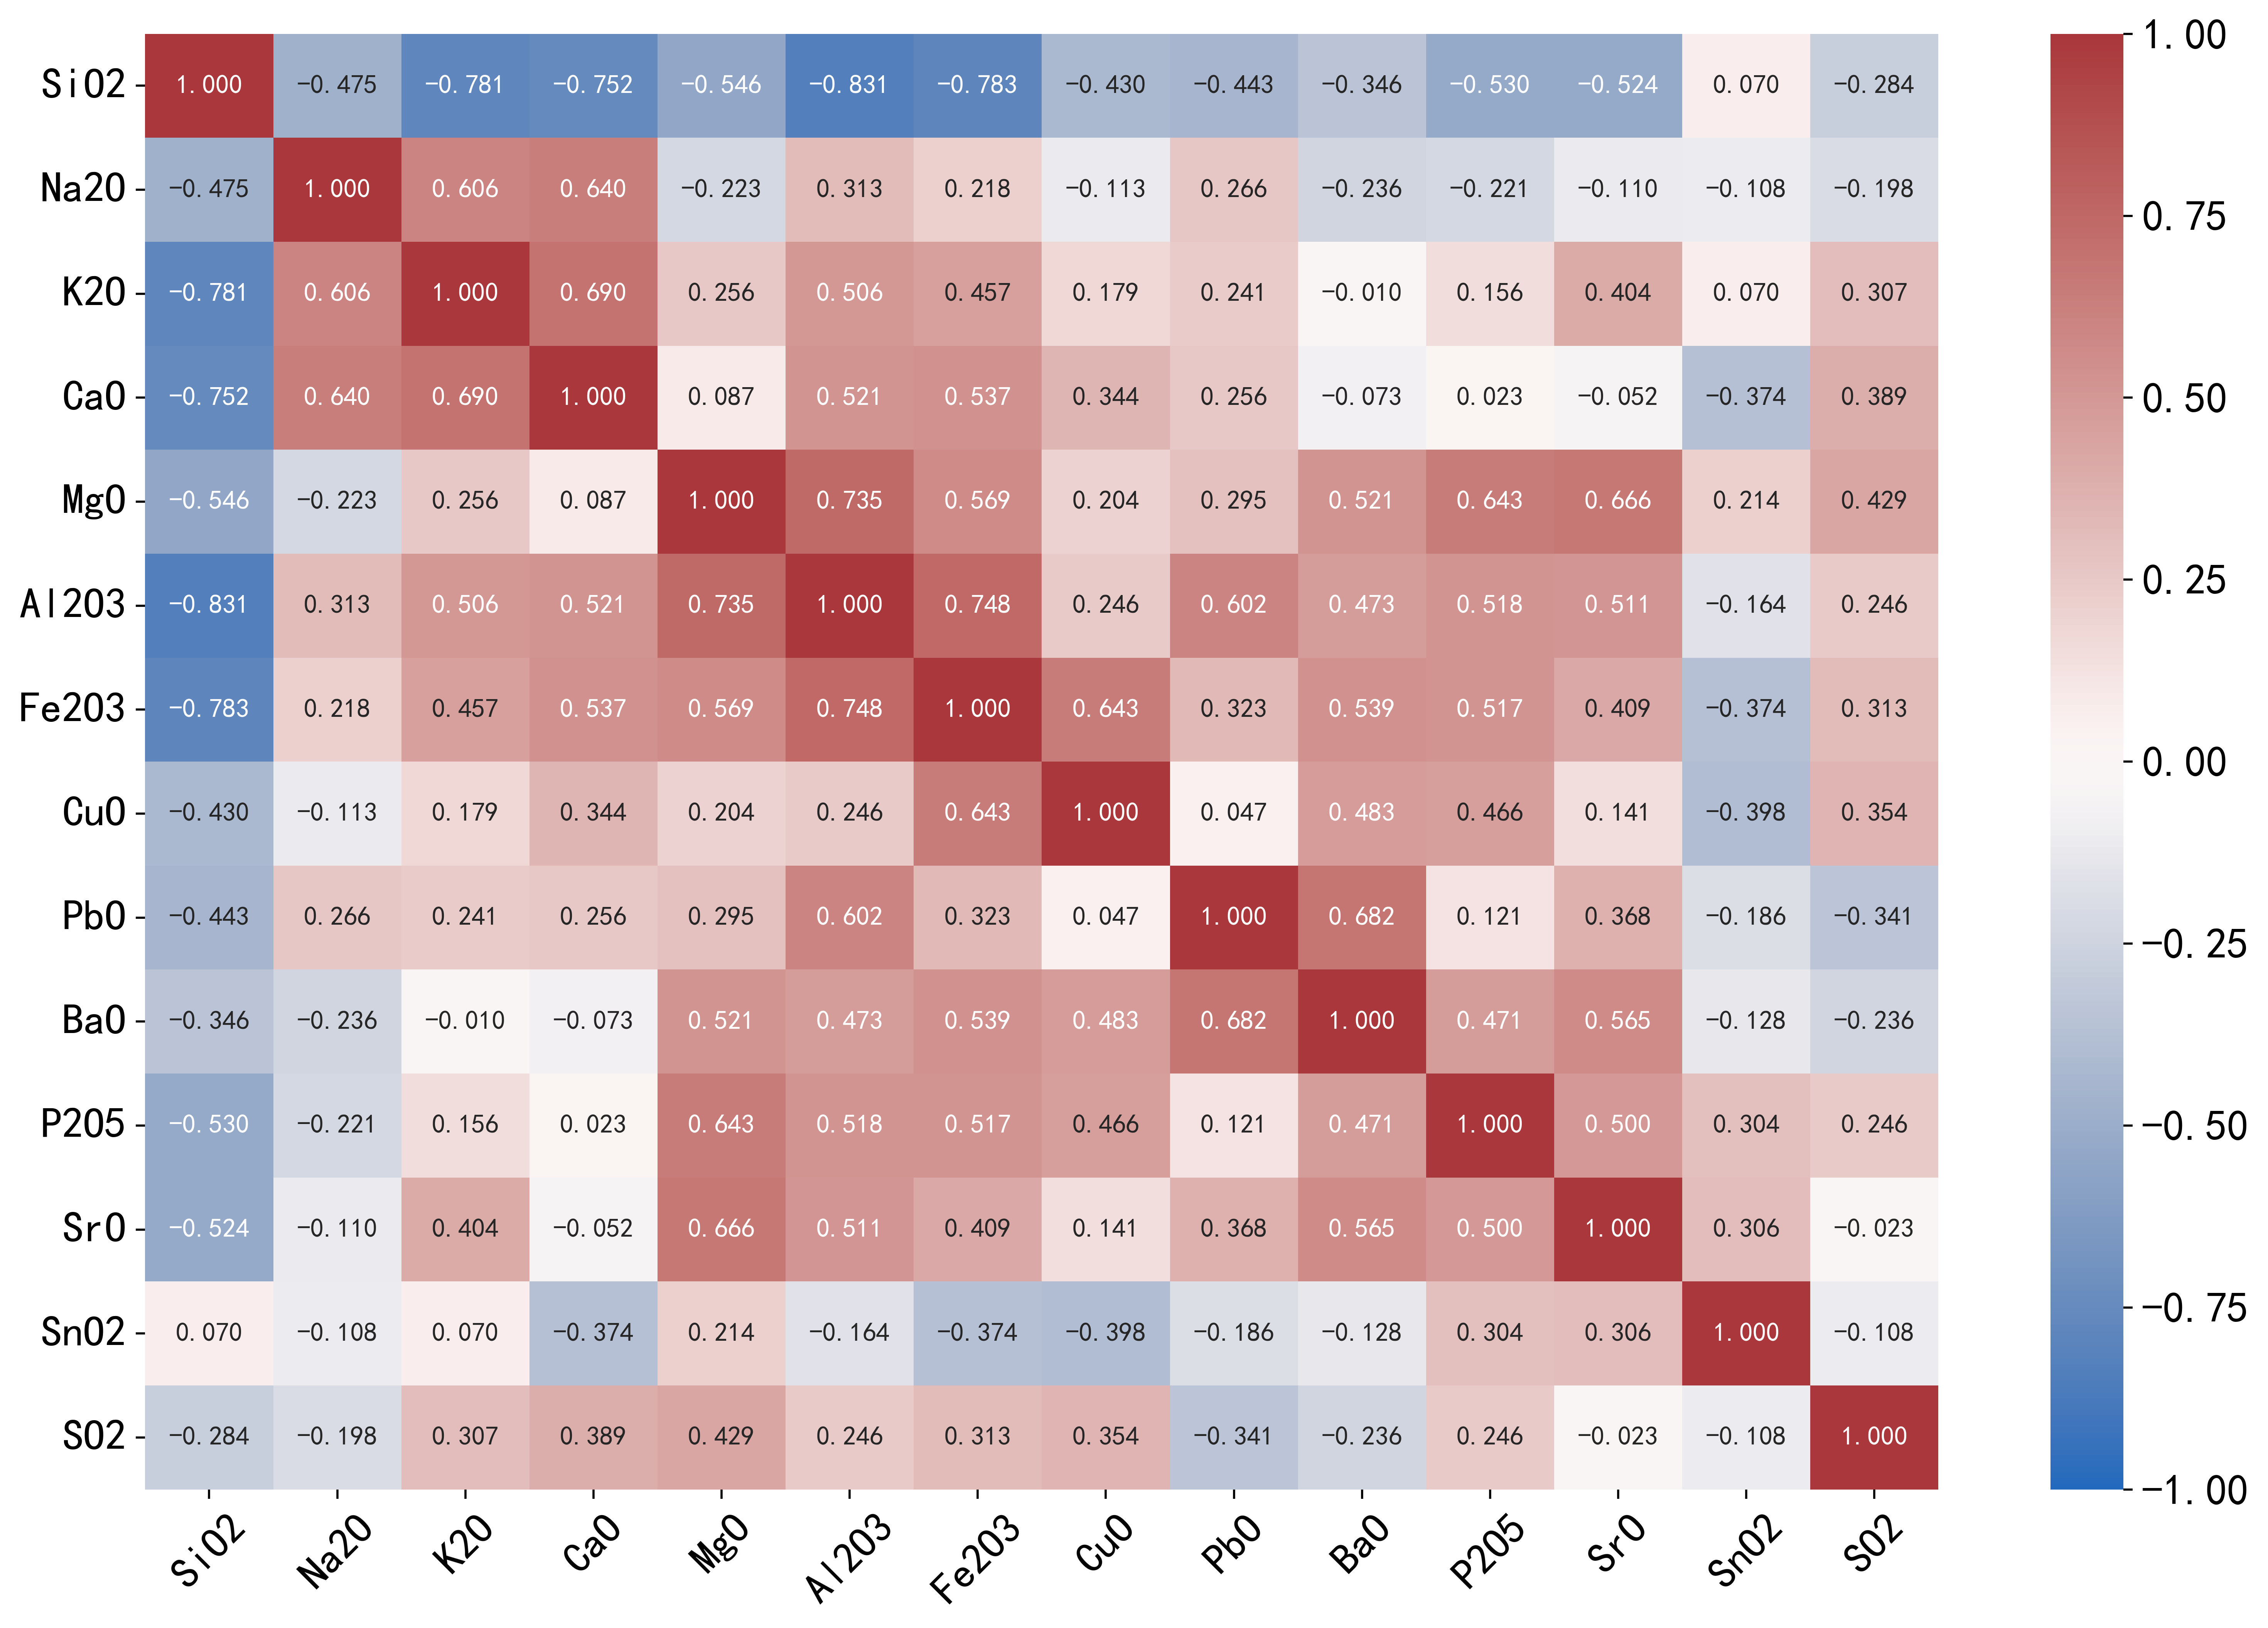

In [68]:
# 在heatmap(square=False)时可以调整图片大小，x、y轴标签的方向
plt.figure(figsize=(15,10),dpi=500)
ax = sns.heatmap(correlations2, vmin=-1, vmax=1, cmap=cmap, annot=True, fmt='.3f')
ax.set_xticklabels(col, rotation=45)
ax.set_yticklabels(col, rotation='horizontal')
plt.savefig('C:/Users/86180/Desktop/C题/image/cor_k.svg')
plt.show()

### 以0.01为阈值的热力图

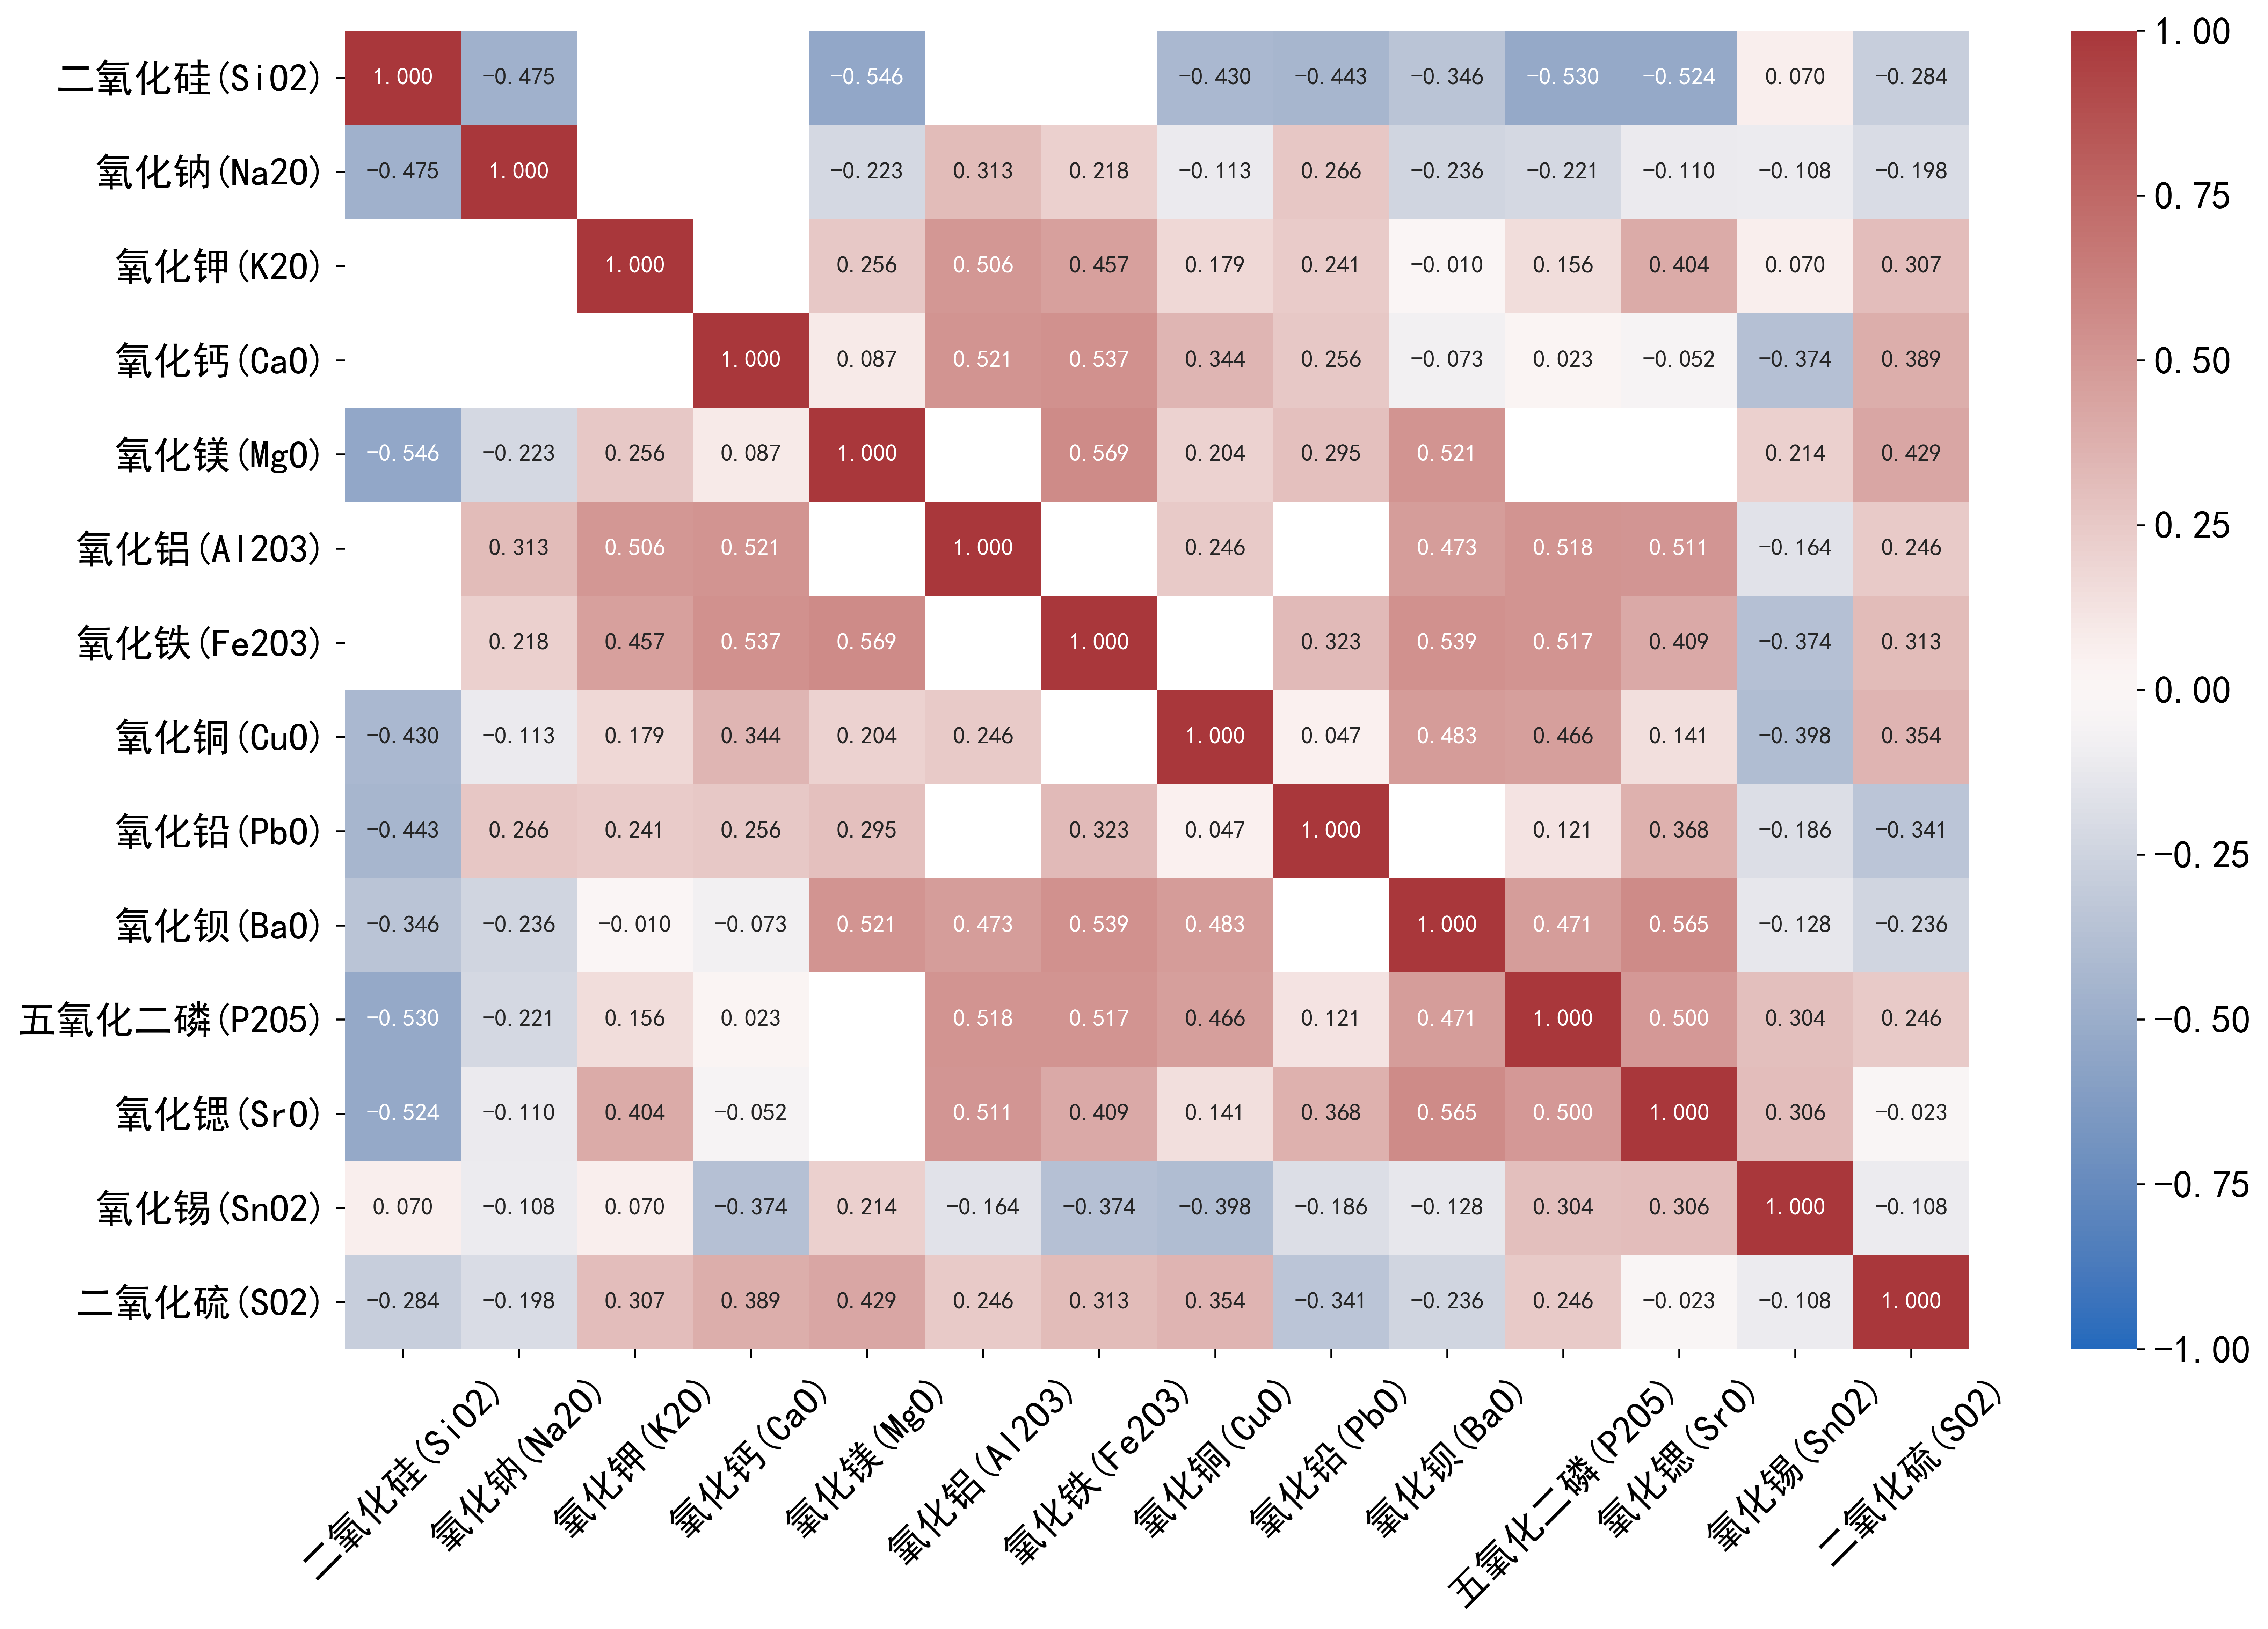

In [62]:
# 在heatmap(square=False)时可以调整图片大小，x、y轴标签的方向
plt.figure(figsize=(15,10))
ax = sns.heatmap(cor_k, vmin=-1, vmax=1, cmap=cmap, annot=True, fmt='.3f')
ax.set_xticklabels(df_cor2.columns, rotation=45)
ax.set_yticklabels(df_cor2.columns, rotation='horizontal')
plt.savefig('C:/Users/86180/Desktop/C题/image/cor_p_0.01.png')
plt.show()

### 以0.05为阈值的热力图

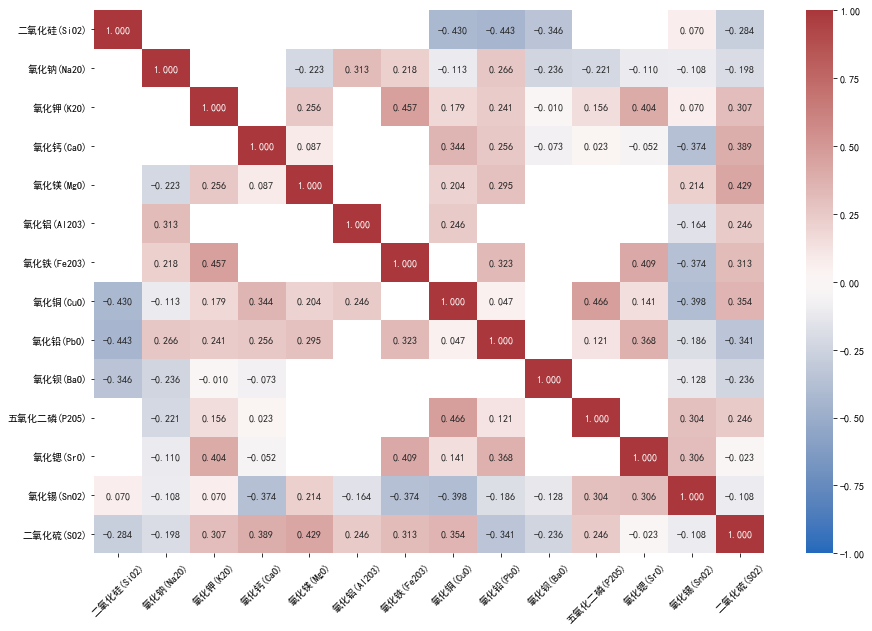

In [31]:
# 在heatmap(square=False)时可以调整图片大小，x、y轴标签的方向
plt.figure(figsize=(15,10))
ax = sns.heatmap(COR_k, vmin=-1, vmax=1, cmap=cmap, annot=True, fmt='.3f')
ax.set_xticklabels(df_cor2.columns, rotation=45)
ax.set_yticklabels(df_cor2.columns, rotation='horizontal')
plt.savefig('C:/Users/86180/Desktop/C题/image/cor_k_0.05.png')
plt.show()

## 矩阵差异性

In [44]:
cor_k_2=cor_k[Cor_k<1].fillna(0)
cor_p_2=cor_p[Cor_p<1].fillna(0)
# 去掉和自己的关系
d2=pd.DataFrame((cor_p_2>0).sum(),columns=['正相关个数'])
d2['负相关个数']=(cor_p_2<0).sum()
d2['强相关个数']=(cor_p_2>0.5).sum()
d2['绝对值最大值']=abs(cor_p_2).max()
d1['绝对值平均值']=abs(cor_p_2[abs(cor_p_2)>0]).mean().fillna(0)
d1.to_csv('./相互相关性分析/铅钡.csv',encoding='utf-8-sig')
d2

正相关个数  负相关个数  强相关个数    绝对值最大值
二氧化硅(SiO2)       4      2      0  0.313389
氧化钠(Na2O)        4      6      0  0.356937
氧化钾(K2O)         5      7      0  0.361934
氧化钙(CaO)         6      3      0  0.351002
氧化镁(MgO)         8      2      0  0.361934
氧化铝(Al2O3)       3      3      0  0.333386
氧化铁(Fe2O3)       6      3      0  0.363359
氧化铜(CuO)         3      6      0  0.356004
氧化铅(PbO)         5      6      0  0.362154
氧化钡(BaO)         2      6      0  0.279576
五氧化二磷(P2O5)      6      4      0  0.361346
氧化锶(SrO)         8      4      0  0.362154
氧化锡(SnO2)        7      6      0  0.363359
二氧化硫(SO2)        3      6      0  0.336783

In [40]:
# 去掉和自己的关系
d1=pd.DataFrame((cor_k_2>0).sum(),columns=['正相关个数'])
d1['负相关个数']=(cor_k_2<0).sum()
d1['强相关个数']=(cor_k_2>0.5).sum()
d1['绝对值最大值']=abs(cor_k_2).max()
d1['绝对值平均值']=abs(cor_k_2[abs(cor_k_2)>0]).mean().fillna(0)
d1.to_csv('./相互相关性分析/高钾.csv',encoding='utf-8-sig')
d1

正相关个数  负相关个数  强相关个数    绝对值最大值    绝对值平均值
二氧化硅(SiO2)       1      8      0  0.545547  0.405120
氧化钠(Na2O)        3      8      0  0.474950  0.225408
氧化钾(K2O)         9      1      1  0.505689  0.258676
氧化钙(CaO)         7      3      2  0.536674  0.265636
氧化镁(MgO)         8      2      2  0.569492  0.334495
氧化铝(Al2O3)       8      1      4  0.521425  0.388728
氧化铁(Fe2O3)       9      1      4  0.569492  0.425562
氧化铜(CuO)         9      3      0  0.482723  0.283629
氧化铅(PbO)         8      3      0  0.442526  0.262434
氧化钡(BaO)         6      6      3  0.564552  0.339926
五氧化二磷(P2O5)     10      2      2  0.529685  0.339354
氧化锶(SrO)         8      4      2  0.564552  0.325942
氧化锡(SnO2)        5      8      0  0.397565  0.215755
二氧化硫(SO2)        7      6      0  0.428757  0.267340

## 选取较大值散点图

In [62]:
df_cor1.columns

Index(['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)',
       '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)',
       '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)'],
      dtype='object')

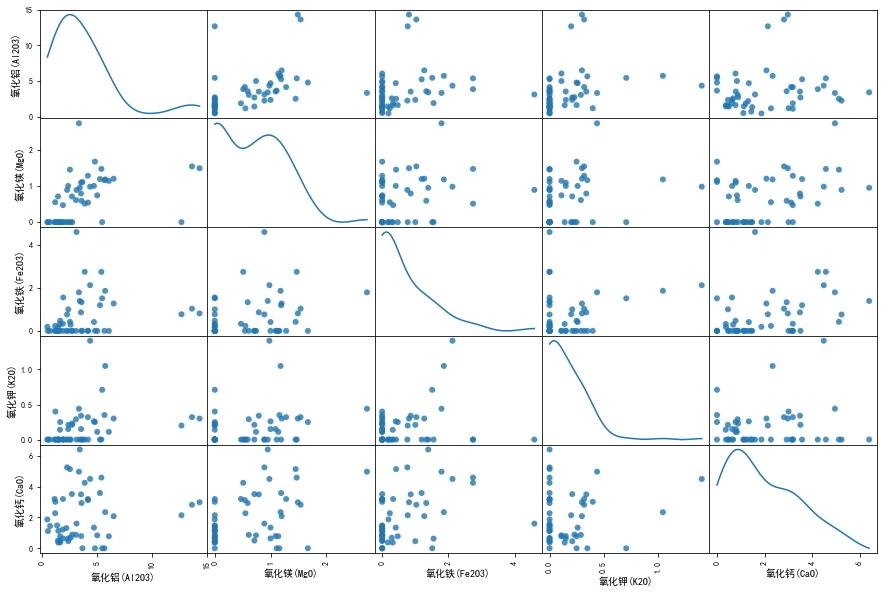

In [47]:
scat_1 = df_cor1[['氧化铝(Al2O3)','氧化镁(MgO)','氧化铁(Fe2O3)', '氧化钾(K2O)', '氧化钙(CaO)']]
scatter_matrix(
    scat_1, figsize=(15, 10), marker="o", diagonal="kde", alpha=0.8, range_padding=0.1
)
plt.savefig('C:/Users/86180/Desktop/C题/image/scatter_p')
plt.show()

In [50]:
scat_2 = df_cor1[['氧化铝(Al2O3)','氧化铁(Fe2O3)','氧化铜(CuO)', '氧化钡(BaO)','五氧化二磷(P2O5)', '氧化锶(SrO)']]

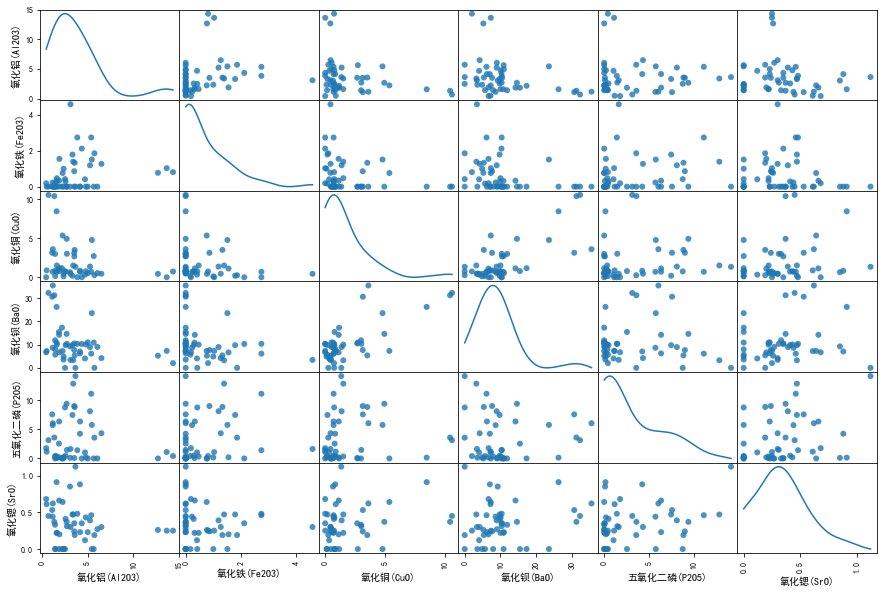

In [51]:
scatter_matrix(
    scat_2, figsize=(15, 10), marker="o", diagonal="kde", alpha=0.8, range_padding=0.1
)
plt.savefig('C:/Users/86180/Desktop/C题/image/scatter_p2')
plt.show()

In [114]:
scat1 = df_cor2[['氧化铝(Al2O3)','氧化镁(MgO)','氧化铁(Fe2O3)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)']]

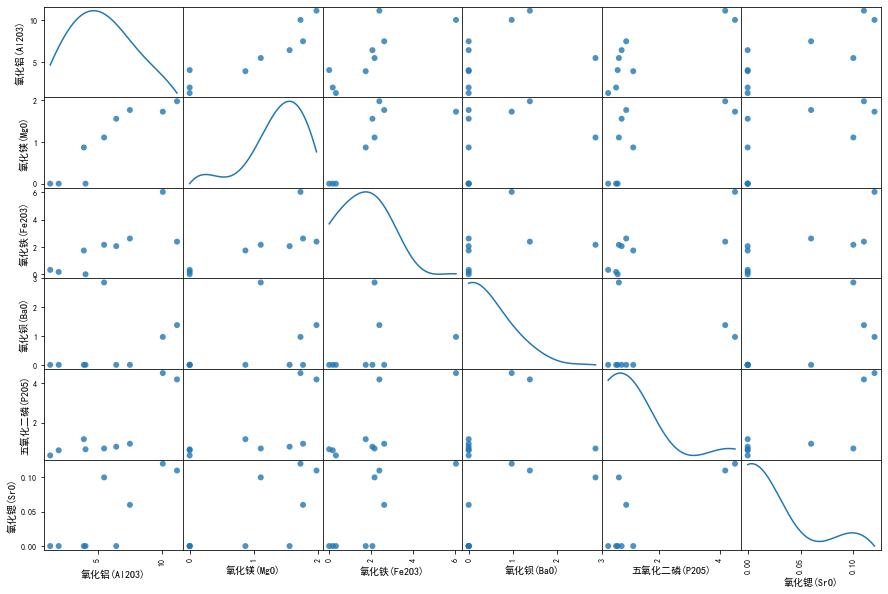

In [115]:
scatter_matrix(
    scat_4, figsize=(15, 10), marker="o", diagonal="kde", alpha=0.8, range_padding=0.1
)
plt.savefig('C:/Users/86180/Desktop/C题/image/scatter_k5')
plt.show()

In [108]:
scat_3 = df_cor2[[ '氧化钾(K2O)', '氧化铝(Al2O3)','氧化镁(MgO)','氧化铁(Fe2O3)']]

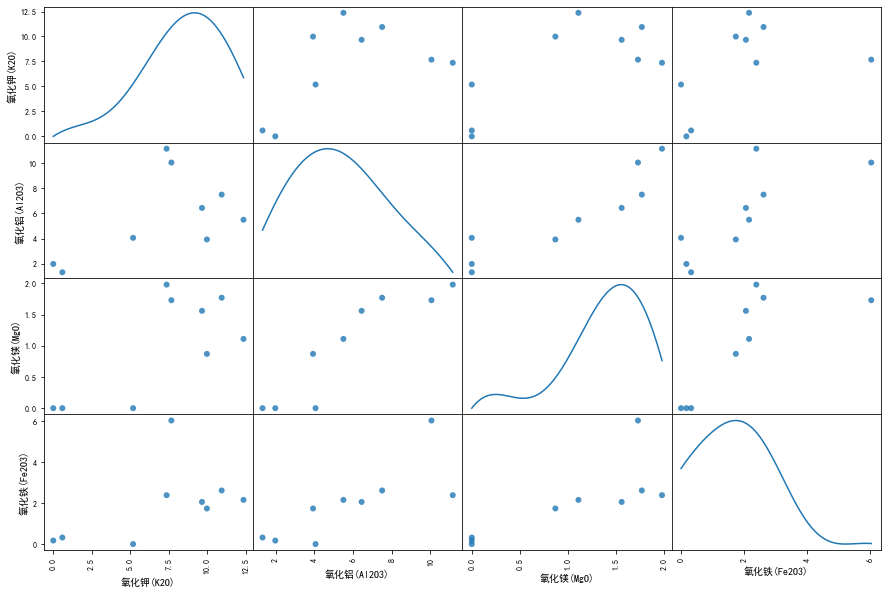

In [109]:
scatter_matrix(
    scat_3, figsize=(15, 10), marker="o", diagonal="kde", alpha=0.8, range_padding=0.1
)
plt.savefig('C:/Users/86180/Desktop/C题/image/scatter_k3')
plt.show()

## 做差？！

In [55]:
dif = (correlations2-correlations1)# 高钾-铅钡
dif = dif[dif!=-1].fillna(0)
dif

二氧化硅(SiO2)  氧化钠(Na2O)  氧化钾(K2O)  氧化钙(CaO)  氧化镁(MgO)  氧化铝(Al2O3)  \
二氧化硅(SiO2)     0.000000  -0.879762 -1.088930 -0.261835 -0.668605   -1.255407   
氧化钠(Na2O)     -0.879762   0.000000  0.539728  1.007348 -0.246686    0.167797   
氧化钾(K2O)      -1.088930   0.539728  0.000000  0.724899 -0.105976   -0.006734   
氧化钙(CaO)      -0.261835   1.007348  0.724899  0.000000 -0.237756    0.398878   
氧化镁(MgO)      -0.668605  -0.246686 -0.105976 -0.237756  0.000000    0.061197   
氧化铝(Al2O3)    -1.255407   0.167797 -0.006734  0.398878  0.061197    0.000000   
氧化铁(Fe2O3)    -0.826468   0.422170  0.308091  0.125400  0.311908    0.360505   
氧化铜(CuO)       0.017285  -0.010416  0.376929  0.381154  0.469589    0.570610   
氧化铅(PbO)       0.314789   0.622529  0.577009 -0.094979  0.371181    0.990735   
氧化钡(BaO)      -0.066161  -0.322072 -0.009391  0.083902  0.956027    0.842281   
五氧化二磷(P2O5)    0.008129   0.348751  0.296040 -0.479166  0.490412    0.537604   
氧化锶(SrO)       0.028762   0.039142  0.570942 -0.359948  0.591601    0.707915   
氧化锡(SnO2)     -0.028158  -0.015245 -0.069745 -0.658146 -0.044869   -0.497005   
二氧化硫(SO2)      0.029054   0.010841  0.329631  0.311169  0.796528    0.631067   

             氧化铁(Fe2O3)  氧化铜(CuO)  氧化铅(PbO)  氧化钡(BaO)  五氧化二磷(P2O5)  氧化锶(SrO)  \
二氧化硅(SiO2)    -0.826468  0.017285  0.314789 -0.066161     0.008129  0.028762   
氧化钠(Na2O)      0.422170 -0.010416  0.622529 -0.322072     0.348751  0.039142   
氧化钾(K2O)       0.308091  0.376929  0.577009 -0.009391     0.296040  0.570942   
氧化钙(CaO)       0.125400  0.381154 -0.094979  0.083902    -0.479166 -0.359948   
氧化镁(MgO)       0.311908  0.469589  0.371181  0.956027     0.490412  0.591601   
氧化铝(Al2O3)     0.360505  0.570610  0.990735  0.842281     0.537604  0.707915   
氧化铁(Fe2O3)     0.000000  1.032135  0.241811  0.981445     0.291733  0.524989   
氧化铜(CuO)       1.032135  0.000000 -0.046580 -0.011956     0.245372 -0.041378   
氧化铅(PbO)       0.241811 -0.046580  0.000000  0.781341    -0.240381  0.005555   
氧化钡(BaO)       0.981445 -0.011956  0.781341  0.000000     0.639577  0.382868   
五氧化二磷(P2O5)    0.291733  0.245372 -0.240381  0.639577     0.000000  0.245156   
氧化锶(SrO)       0.524989 -0.041378  0.005555  0.382868     0.245156  0.000000   
氧化锡(SnO2)     -0.737538 -0.041561 -0.094138 -0.108269     0.336867  0.292320   
二氧化硫(SO2)      0.649871 -0.094129 -0.233584 -0.702123     0.046339 -0.249474   

             氧化锡(SnO2)  二氧化硫(SO2)  
二氧化硅(SiO2)   -0.028158   0.029054  
氧化钠(Na2O)    -0.015245   0.010841  
氧化钾(K2O)     -0.069745   0.329631  
氧化钙(CaO)     -0.658146   0.311169  
氧化镁(MgO)     -0.044869   0.796528  
氧化铝(Al2O3)   -0.497005   0.631067  
氧化铁(Fe2O3)   -0.737538   0.649871  
氧化铜(CuO)     -0.041561  -0.094129  
氧化铅(PbO)     -0.094138  -0.233584  
氧化钡(BaO)     -0.108269  -0.702123  
五氧化二磷(P2O5)   0.336867   0.046339  
氧化锶(SrO)      0.292320  -0.249474  
氧化锡(SnO2)     0.000000   0.005283  
二氧化硫(SO2)     0.005283   0.000000

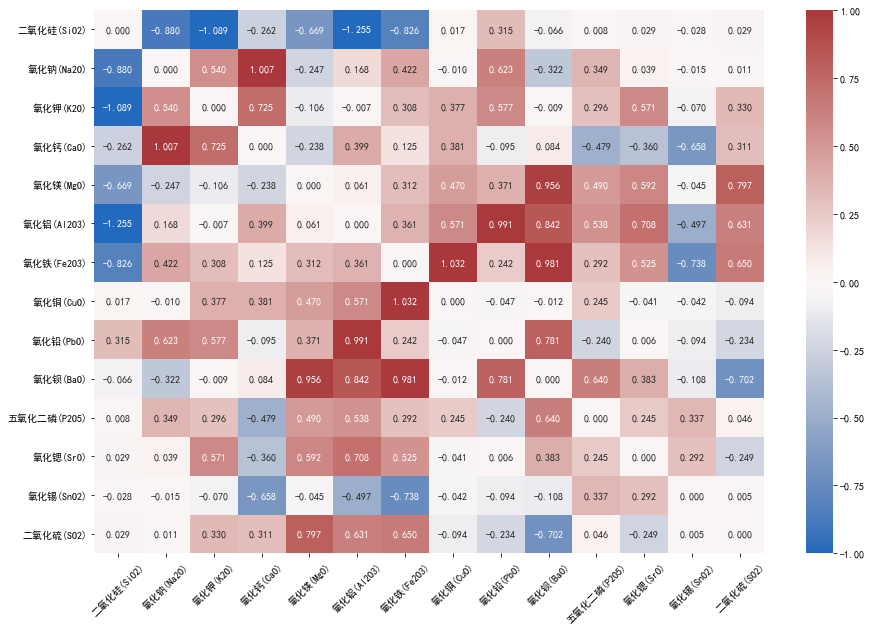

In [56]:
# 在heatmap(square=False)时可以调整图片大小，x、y轴标签的方向
plt.figure(figsize=(15,10))
ax = sns.heatmap(dif, vmin=-1, vmax=1, cmap=cmap, annot=True, fmt='.3f')
ax.set_xticklabels(df_cor2.columns, rotation=45)
ax.set_yticklabels(df_cor2.columns, rotation='horizontal')
#plt.savefig('C:/Users/86180/Desktop/C题/image/cor_k')
plt.show()